In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 3.0)

# Aufgabe 2.1

In [3]:
def tanh_exact(x):
    y = np.exp( 2 * x )
    return (y - 1) / (y + 1)
def tanh_taylor(x):
    return x - x**3/3 + 2*x**5/15 - 17*x**7/315

def runtime(func, x_all):
    t0 = time.time()
    for x in x_all:
        tanh_exact(x)
    return time.time() - t0

n = 1000000
x_all = np.linspace(0,1, n)
print("Runtime of %i times: \n The approache with sinh(x)/cosh(x)\
 needs %.4f secunds and the approache with Taylor series %.4f secunds" 
      %(n,    runtime(tanh_exact, x_all),     runtime(tanh_taylor, x_all))     )

Runtime of 1000000 times: 
 The approache with sinh(x)/cosh(x) needs 1.9342 secunds and the approache with Taylor series 2.2519 secunds


# Aufgabe 2.2
Analytical we get the result:
$\sum_n^\infty\frac{2n + 1}{n^2 (n + 1)^2}$ = 1

Decreasing should give better values then increasing. $Kleine Zahl +  Kleine Zahl =  Kleiner Fehler$ und so

46.97856020927429


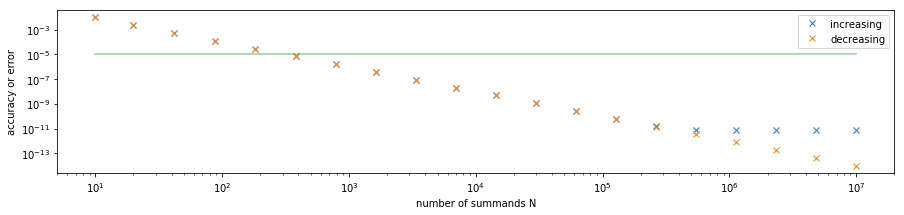

In [11]:
"""
Achtung: Rechnet lange!
"""
def increasing(N):   
    return sum([ (2 * n + 1) / (n**2 * (n + 1)**2) for n in range(1,N) ])
def decreasing(N):   
    return sum([ (2 * (N-n) + 1) / ((N-n)**2 * ( N -n + 1)**2) for n in range(1,N) ])

t0 = time.time()
used = set()
n_rang = [x for x in [int(x) for x in (np.logspace(1, 7, 20))] if x not in used and (used.add(x) or True)]
plt.plot(n_rang, [ 1 - increasing(N) for N in n_rang], "x", label="increasing")
plt.plot(n_rang, [ 1 - decreasing(N) for N in n_rang], "x", label="decreasing")
plt.plot(np.array(n_rang), 1e-5 + 0*(np.array(n_rang)), alpha = 0.5)
plt.xlabel("number of summands N")
plt.ylabel("accuracy or error")
plt.legend()
plt.loglog()
print(time.time() - t0)

In [4]:
accuracy, N = 1, 0
while accuracy >= 1e-5:
    accuracy = 1 - increasing(N)
    N += 1
print("To reach an accuracy of 10^−5 we need %i terms."%N)

NameError: name 'increasing' is not defined

146 150


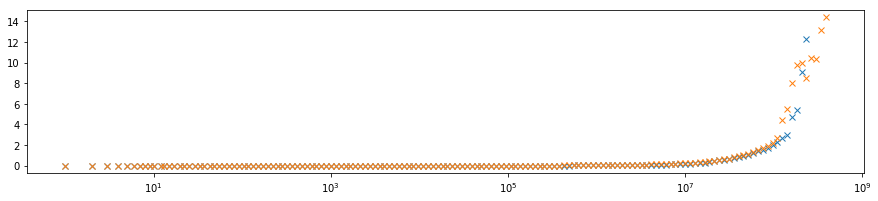

In [6]:
werte_increasing_file = np.loadtxt("increasing.npy")
werte_decreasing_file = np.loadtxt("decreasing.npy")
print(len(werte_increasing_file), len(werte_decreasing_file))
plt.plot(werte_increasing_file[:,0],werte_increasing_file[:,-1]/60,"x")
plt.plot(werte_decreasing_file[:,0],werte_decreasing_file[:,-1]/60,"x")
plt.semilogx()
#plt.loglog()
plt.show()
#plt.plot(werte_increasing_file[:,0],werte_increasing_file[:,1],"x")
#plt.plot(werte_decreasing_file[:,0],werte_decreasing_file[:,1],"x")
#plt.xlim((1e7, 3e8))
#plt.ylim(1e-10, 1e-15)
#plt.loglog()
#plt.semilogx()

# Aufgabe 2.3


In [9]:
def iteration1(x_0, N):
    n = 0
    x_n = x_0
    while n<=N+1:
        x_n_p_1 = 4 * x_n * (1 - x_n)
        x_n = x_n_p_1
        n += 1
    return x_n_p_1

def iteration2(ϕ_0, N):
    n = 0
    ϕ_n = ϕ_0
    while n<=N+1:
        ϕ_n_p_1 = 1 - 2 * abs(ϕ_n - 1/2)
        ϕ_n = ϕ_n_p_1
        n += 1
    return ϕ_n_p_1

In [11]:
N_range = np.arange(0,15)
N_range = np.arange(0,100)
x_range = np.linspace(0,1, 80)
x_range = np.sin( np.pi / 2 * np.linspace(0,1, 80))
ϕ_range = np.linspace(0,1, 80)
chaotic_map1 = np.array([np.array([iteration1(x_0, N) for N in N_range]) for x_0 in x_range ])
chaotic_map2 = np.array([np.array([iteration2(ϕ_0, N) for N in N_range]) for ϕ_0 in ϕ_range ])

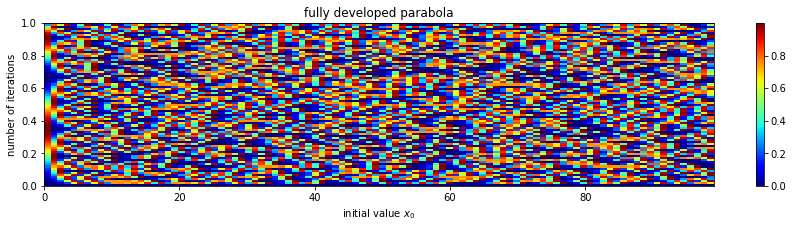

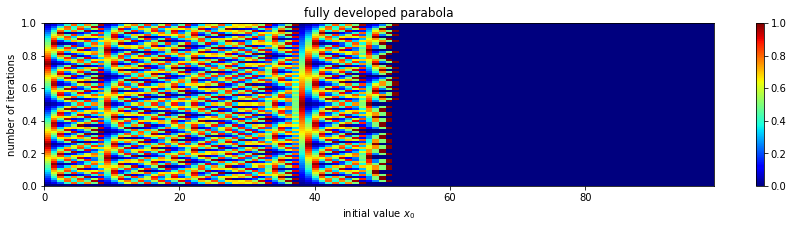

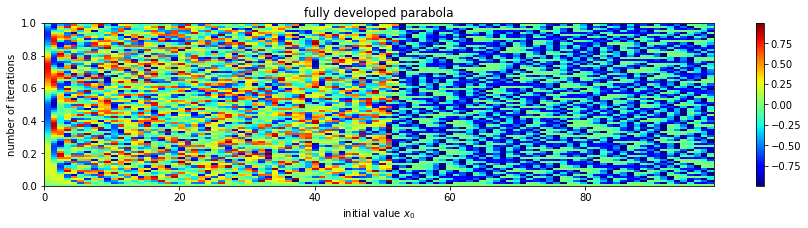

In [12]:
plt.imshow(chaotic_map1,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()
plt.imshow(chaotic_map2,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()
plt.imshow(chaotic_map2-chaotic_map1,cmap='jet', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()

(array([ 279.,  120.,   81.,   64.,   76.,   86.,   70.,   76.,  105.,  243.]),
 array([ 0.        ,  0.09999998,  0.19999996,  0.29999995,  0.39999993,
         0.49999991,  0.59999989,  0.69999987,  0.79999985,  0.89999984,
         0.99999982]),
 <a list of 10 Patch objects>)

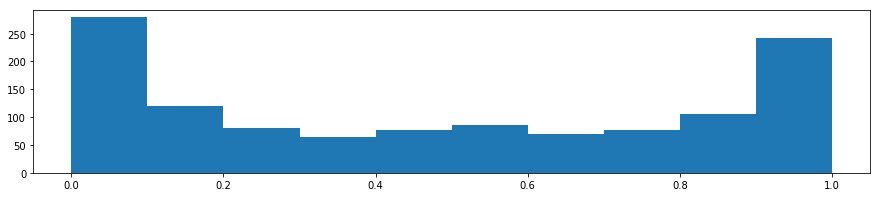

In [16]:
liste = np.reshape(chaotic_map1, chaotic_map1.shape[0]*chaotic_map1.shape[1])
plt.hist(liste)

In [5]:
used = set()
n_rang = [x for x in [int(x) for x in (np.logspace(1, 10, 200))] if x not in used and (used.add(x) or True)]
n_rang

[10,
 11,
 12,
 13,
 15,
 16,
 18,
 20,
 23,
 25,
 28,
 31,
 34,
 38,
 42,
 47,
 52,
 58,
 65,
 72,
 80,
 89,
 98,
 109,
 121,
 135,
 149,
 166,
 184,
 204,
 227,
 252,
 280,
 310,
 344,
 382,
 424,
 471,
 523,
 580,
 644,
 714,
 793,
 880,
 977,
 1084,
 1203,
 1335,
 1482,
 1644,
 1825,
 2025,
 2247,
 2494,
 2768,
 3072,
 3409,
 3783,
 4198,
 4659,
 5170,
 5738,
 6368,
 7067,
 7842,
 8703,
 9658,
 10718,
 11895,
 13200,
 14649,
 16257,
 18041,
 20022,
 22219,
 24658,
 27364,
 30367,
 33700,
 37399,
 41504,
 46059,
 51114,
 56724,
 62949,
 69858,
 77525,
 86034,
 95477,
 105956,
 117584,
 130490,
 144811,
 160705,
 178343,
 197916,
 219638,
 243744,
 270495,
 300183,
 333129,
 369691,
 410265,
 455293,
 505263,
 560716,
 622257,
 690551,
 766341,
 850448,
 943787,
 1047370,
 1162322,
 1289890,
 1431458,
 1588565,
 1762914,
 1956398,
 2171117,
 2409403,
 2673841,
 2967302,
 3292971,
 3654383,
 4055460,
 4500557,
 4994505,
 5542664,
 6150985,
 6826071,
 7575250,
 8406652,
 9329304,
 1035

In [ ]:
8.917.667.107

In [ ]:
.235.428.641

In [8]:
range(100)

range(0, 100)
